In [1]:
import pandas as pd
import numpy  as np
import matplotlib as plt

In [16]:
df1 = pd.read_csv('./dataset_02_11.csv', sep=',')
#df1 = pd.read_csv('./teste_02_11.csv', sep=',')
#df1.dtypes
#df1 = df1[['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size','duration','block_x']]
#df1 = df1[['compute_version','registers','smem','cmem','AppId','number_of_lines_kernel','occupancy','duration','block_x']]
#df1.dtypes
#df1 = pd.read_csv('./da.csv', sep=',', names=['null','AppName','block_x','compute_version','registers','smem','cmem', 'number_of_lines_kernel','occupancy','AppId'])
#df1 = df1.drop(columns= ["null"], axis = 1)
#df1['AppId'].unique()
#df1.isnull().sum()
df1[df1['AppId'] == 5].tail()

,AppName_x,compute_version,gpu_id,gpu_name,input_size,max_clock_rate,num_of_cores,L2,bus,memory_clock,...,grid_x,grid_y,block_x,block_y,AppName_y,registers,smem,cmem,number_of_lines_kernel,occupancy
6685,matrix_sum_normal,5.2,8,GTX-980,7168,1216,2048,2.0,256,3505,...,224,224,32,32,matrix_sum_normal,8,0,348,5,100
6686,matrix_sum_normal,5.2,8,GTX-980,7424,1216,2048,2.0,256,3505,...,232,232,32,32,matrix_sum_normal,8,0,348,5,100
6687,matrix_sum_normal,5.2,8,GTX-980,7680,1216,2048,2.0,256,3505,...,240,240,32,32,matrix_sum_normal,8,0,348,5,100
6688,matrix_sum_normal,5.2,8,GTX-980,7936,1216,2048,2.0,256,3505,...,248,248,32,32,matrix_sum_normal,8,0,348,5,100
6689,matrix_sum_normal,5.2,8,GTX-980,8192,1216,2048,2.0,256,3505,...,256,256,32,32,matrix_sum_normal,8,0,348,5,100


In [3]:
#df1 = df[['AppName','compute_version','registers','smem','cmem','gpu_id','gpu_name','l1_cache_used','max_clock_rate','num_of_cores','L2','bus','memory_clock','bandwith','GM','num_sm','num_cores_sm','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size', 'duration','grid_x','grid_y','block_x','block_y']]
#df1 = df[['AppName','compute_version','registers','smem','cmem','gpu_id','gpu_name','max_clock_rate','num_of_cores','L2','bus','memory_clock','bandwith','GM','num_sm','num_cores_sm','theoretical_flops','AppId','number_of_lines_kernel','occupancy','duration','grid_x','grid_y','block_x','block_y']]

#df1 = df1.sort_values(by='AppId', ascending=True)
#df1['AppId'] = pd.to_numeric(df1['AppId'])
#df1[['registers','smem','cmem','gpu_id','max_clock_rate','num_of_cores','bus','memory_clock','GM','num_sm','num_cores_sm','AppId','number_of_lines_kernel','occupancy','duration','grid_x','grid_y','block_x','block_y']] = df1[['registers','smem','cmem','gpu_id','max_clock_rate','num_of_cores','bus','memory_clock','GM','num_sm','num_cores_sm','AppId','number_of_lines_kernel','occupancy','duration','grid_x','grid_y','block_x','block_y']].astype(float)
df1 = df1.select_dtypes(exclude=['object'])
#df1 = df1.drop(columns= ["Unnamed: 0"], axis = 1)
#df1.to_csv('testando.csv')
#df1=df1.dropna()
#df1.dtypes
#df1.isnull().sum()


In [109]:
from sklearn import metrics

#def mean_absolute_percentage_error(y_true, y_pred): 
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [80]:
#def smape(a, f):
#    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

regressor = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
print('Random Forest Regressor')
for idApp in range(1,10):
  idApp = float(idApp)
  
  X_train = df1[df1['AppId'] != idApp]
  Y_train = df1[df1['AppId'] != idApp]['duration']
  X_test = df1[df1['AppId'] == idApp]
  Y_test = df1[df1['AppId'] == idApp]['duration']
  
  yTrain = np.log(Y_train + 0.0000000001)
  yTest = np.log(Y_test + 0.0000000001)
  
  regressor.fit(X_train, yTrain)

  y_pred = regressor.predict(X_test)
  print('Application: ',idApp, 'Percentage: ', mean_absolute_percentage_error(yTest, y_pred))


Random Forest Regressor
Application:  1.0 Percentage:  0.03716433968901796
Application:  2.0 Percentage:  0.0038864039299217534
Application:  3.0 Percentage:  0.004638757236571807
Application:  4.0 Percentage:  0.07640982235287974
Application:  5.0 Percentage:  0.00035219037592428665
Application:  6.0 Percentage:  0.0007191392555893979
Application:  7.0 Percentage:  0.0004680209326685442
Application:  8.0 Percentage:  0.00034263533943253805
Application:  9.0 Percentage:  0.0008080402037395886


regressor = RandomForestRegressor(n_estimators = 200, random_state =42, max_depth=10, max_features=12)

Application:  1.0 Percentage:  0.3943098258041423
Application:  2.0 Percentage:  0.30318749242351867
Application:  3.0 Percentage:  0.27662550697294747
Application:  4.0 Percentage:  0.986445564886126
Application:  5.0 Percentage:  0.06440032098206748
Application:  6.0 Percentage:  0.024321567133716557
Application:  7.0 Percentage:  0.04196004803784913
Application:  8.0 Percentage:  0.012458703549203497
Application:  9.0 Percentage:  0.09743224872503077

C:\Users\Luan Siqueira\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Luan Siqueira\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


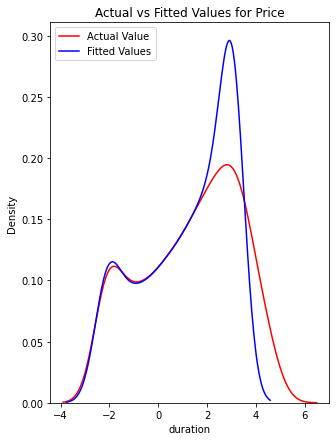

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(yTest, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values",ax=ax)


plt.title('Actual vs Fitted Values for Price')
plt.legend()


plt.show()
plt.close()

smape 100
Application:  1.0 MAPE:  13.041942603834379
Application:  2.0 MAPE:  0.16740623110311517
Application:  3.0 MAPE:  0.1842894766851608
Application:  4.0 MAPE:  0.189450528794812
Application:  5.0 MAPE:  0.14189047299770463
Application:  6.0 MAPE:  0.5376591427967221
Application:  7.0 MAPE:  0.13566828403300812
Application:  8.0 MAPE:  0.148245600785159
Application:  9.0 MAPE:  0.16585427440912995